<a href="https://colab.research.google.com/github/kyook17/BADM576/blob/main/Team10_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**General Instructions**

**Plot Requirements:**

*Each visualization must include a descriptive title and axes labels with units where applicable (e.g., "Total Bill ($)").

*Save each visualization as a PNG file with a resolution of 100 dpi.

**Setup:**

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

sns.set_palette("colorblind")

tips = sns.load_dataset("tips")

print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
(244, 7)


In [4]:
tips.duplicated().sum()

1

In [5]:
tips.drop_duplicates(inplace=True)
tips.duplicated().sum()

0

**1- Compare the distribution of total bill amounts across different days of the week.**

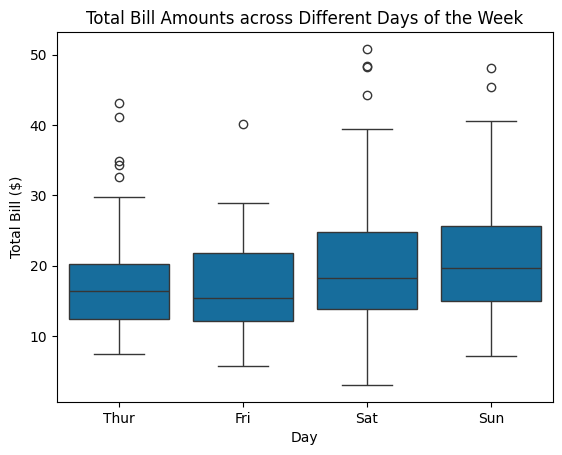

In [6]:
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Total Bill Amounts across Different Days of the Week')
plt.xlabel('Day')
plt.ylabel('Total Bill ($)')
plt.show()

**2- Compare the distribution of tip amounts across meal times (dinner vs. lunch).**

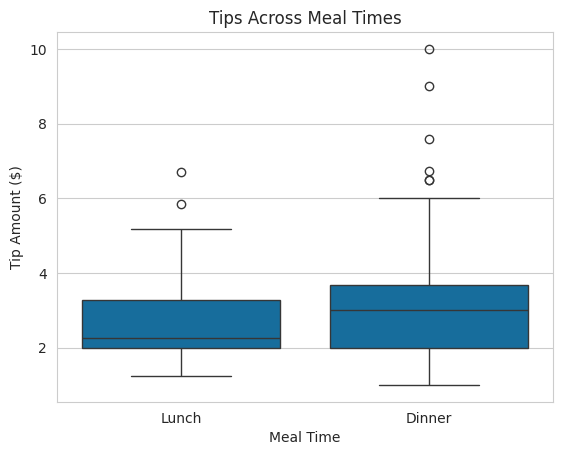

In [ ]:
sns.boxplot(x='time', y='tip', data=tips)
plt.title('Tips Across Meal Times')
plt.xlabel('Meal Time')
plt.ylabel('Tip Amount ($)')
plt.show()

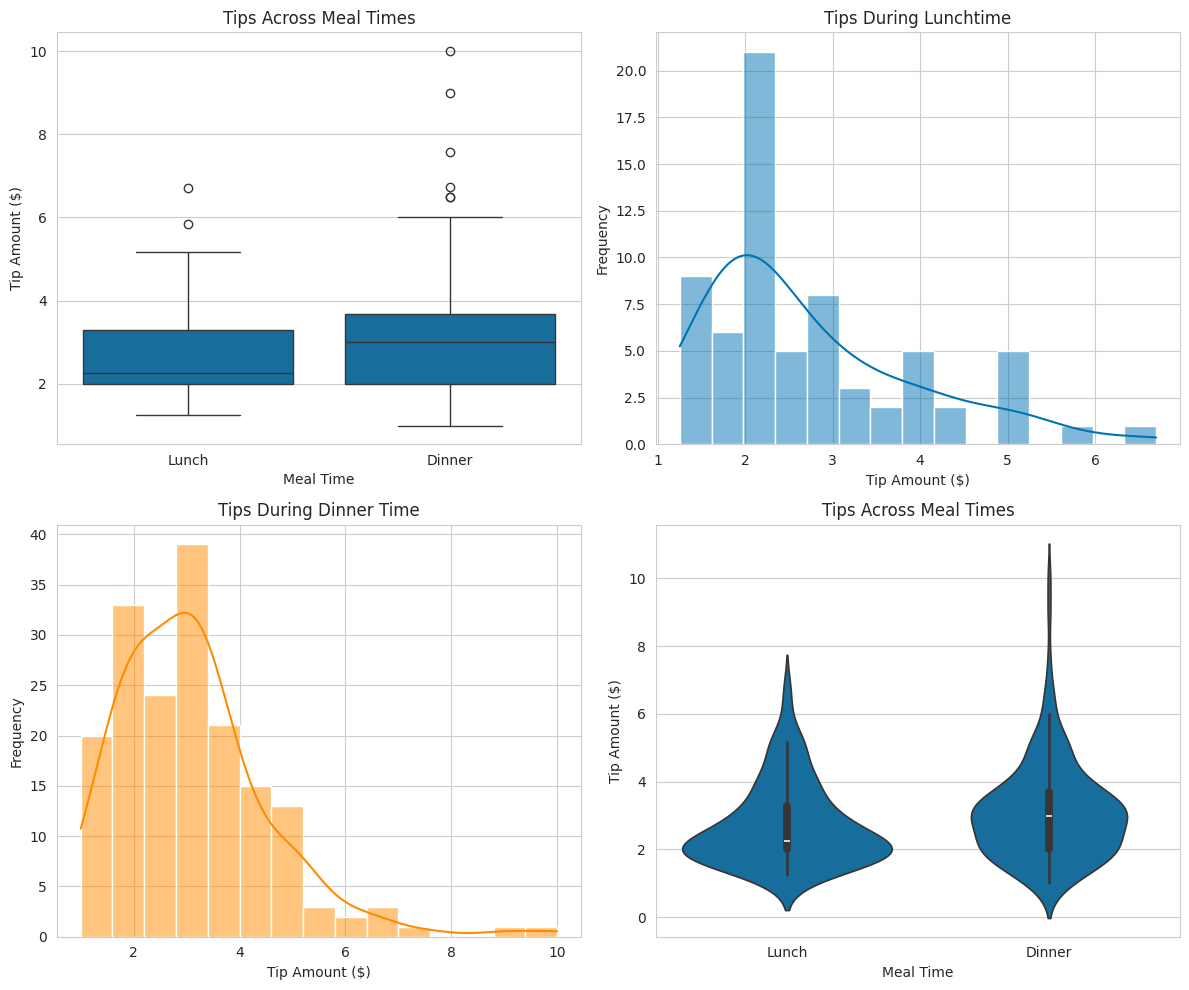

In [ ]:

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Box plot for tip amounts across meal times
sns.boxplot(x='time', y='tip', data=tips, ax=axes[0, 0])
axes[0, 0].set_title('Tips Across Meal Times')
axes[0, 0].set_xlabel('Meal Time')
axes[0, 0].set_ylabel('Tip Amount ($)')

# Histogram for tip amounts during lunchtime
lunch_tips = tips[tips['time'] == 'Lunch']
sns.histplot(lunch_tips['tip'], bins=15, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Tips During Lunchtime')
axes[0, 1].set_xlabel('Tip Amount ($)')
axes[0, 1].set_ylabel('Frequency')

# Histogram for tip amounts during dinner time
dinner_tips = tips[tips['time'] == 'Dinner']
sns.histplot(dinner_tips['tip'], bins=15, kde=True, ax=axes[1, 0], color='darkorange')
axes[1, 0].set_title('Tips During Dinner Time')
axes[1, 0].set_xlabel('Tip Amount ($)')
axes[1, 0].set_ylabel('Frequency')

# Violin plot for tip amounts across meal times
sns.violinplot(x='time', y='tip', data=tips, ax=axes[1, 1])
axes[1, 1].set_title('Tips Across Meal Times')
axes[1, 1].set_xlabel('Meal Time')
axes[1, 1].set_ylabel('Tip Amount ($)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**3- Examine the distribution of tip amounts across different days of the week.**

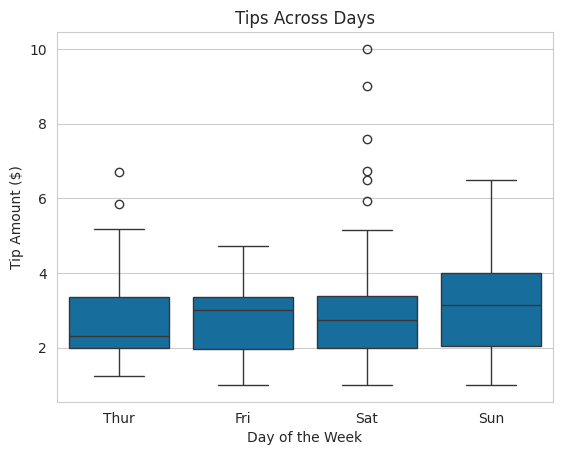

In [ ]:
sns.boxplot(x='day', y='tip', data=tips)
plt.title('Tips Across Days')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount ($)')
plt.show()

**4- Investigate the relationship between tip amount and party size for different days.**

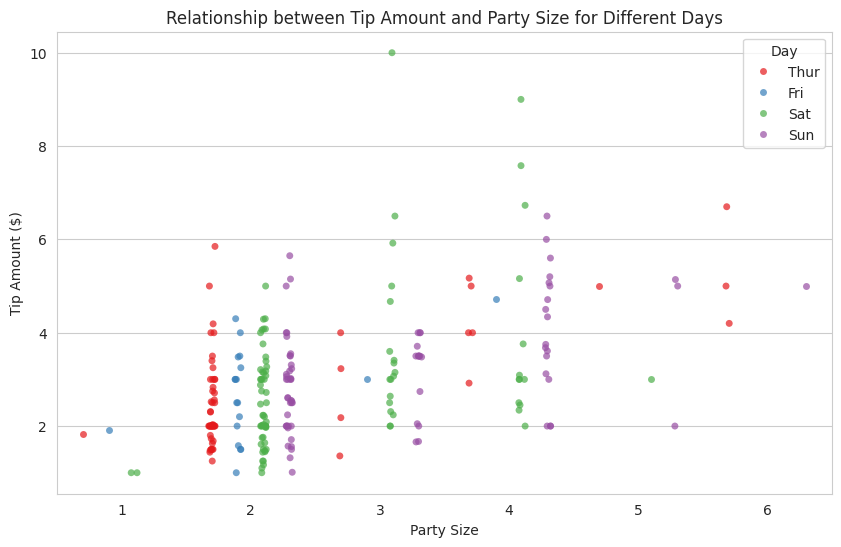

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=tips, x="size", y="tip", hue="day", palette="Set1", dodge=True, jitter=True, alpha=0.7)
plt.title('Relationship between Tip Amount and Party Size for Different Days')
plt.xlabel('Party Size')
plt.ylabel('Tip Amount ($)')
plt.legend(title='Day')
plt.show()

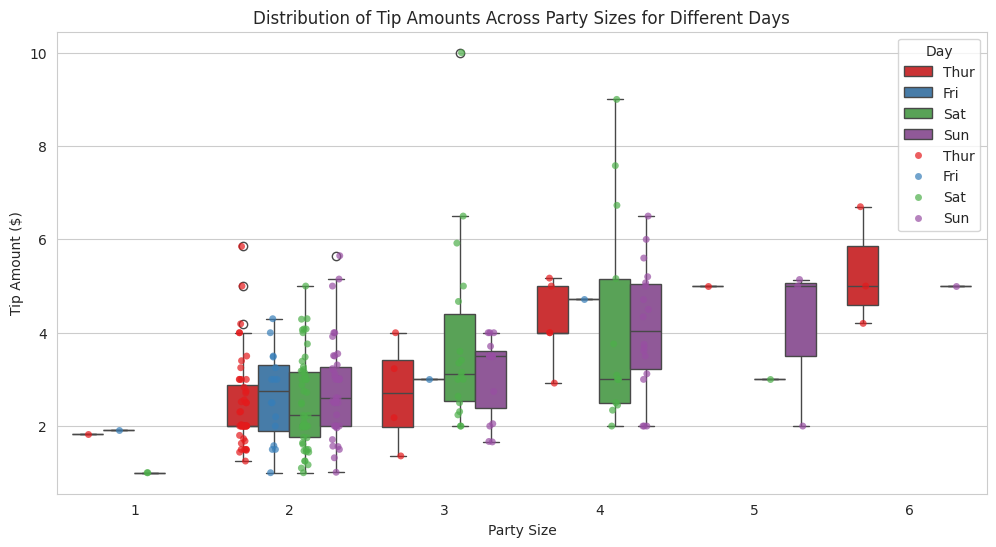

In [ ]:
# Create a side-by-side box plot and strip plot
plt.figure(figsize=(12, 6))

# Box plot
sns.boxplot(data=tips, x="size", y="tip", hue="day", palette="Set1", dodge=True, ax=plt.gca())

# Strip plot with jitter
sns.stripplot(data=tips, x="size", y="tip", hue="day", palette="Set1", dodge=True, jitter=True, alpha=0.7, ax=plt.gca())

plt.title('Distribution of Tip Amounts Across Party Sizes for Different Days')
plt.xlabel('Party Size')
plt.ylabel('Tip Amount ($)')
plt.legend(title='Day')
plt.show()

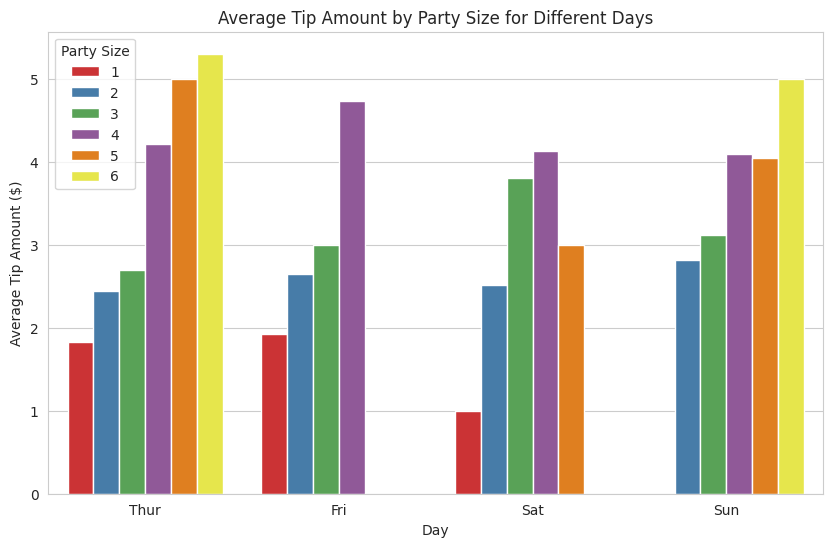

In [ ]:
tip_by_day_size = tips.groupby(['day', 'size'])['tip'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tip_by_day_size, x="day", y="tip", hue="size", palette="Set1")
plt.title('Average Tip Amount by Party Size for Different Days')
plt.xlabel('Day')
plt.ylabel('Average Tip Amount ($)')
plt.legend(title='Party Size')
plt.show()

**5- Analyze the median total bill amounts across days of the week.**

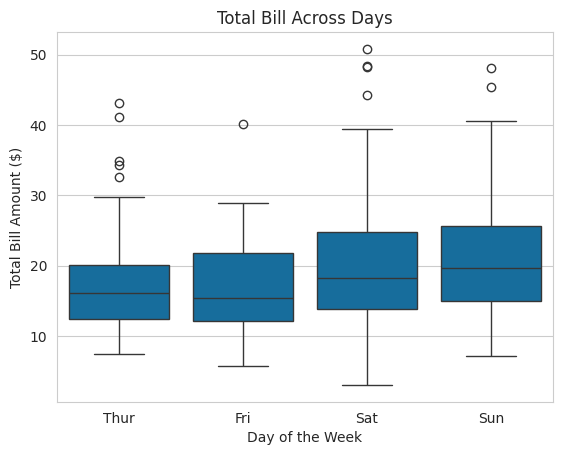

In [ ]:
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Total Bill Across Days')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill Amount ($)')
plt.show()

**6- Explore the relationship between party size and day of the week. Hint: use crosstab and heatmap**

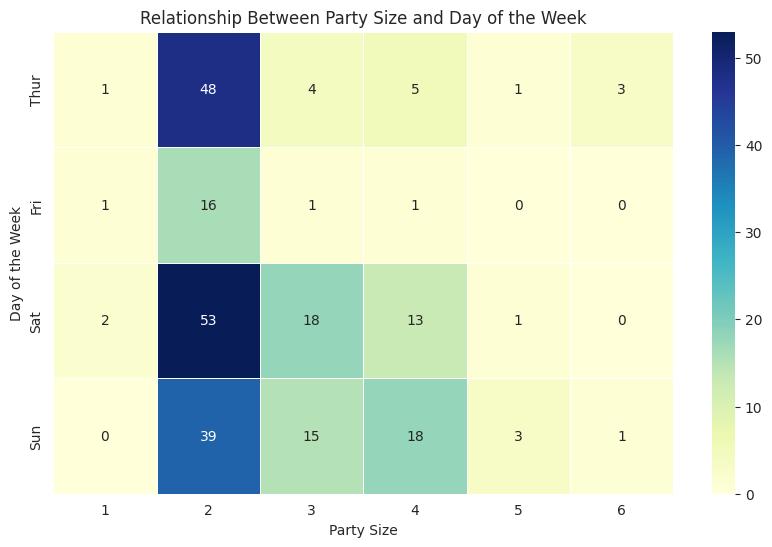

In [ ]:
party_size_day_crosstab = pd.crosstab(tips['day'], tips['size'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(party_size_day_crosstab, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Relationship Between Party Size and Day of the Week')
plt.xlabel('Party Size')
plt.ylabel('Day of the Week')
plt.show()